In [293]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [294]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Basic Data Analyses

In [295]:
df.shape

(8950, 18)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [297]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [298]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analyses - EDA

In [299]:
df = df.drop('CUST_ID', axis=1)

In [300]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [301]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [302]:
skew_values = df.skew()
print(skew_values)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


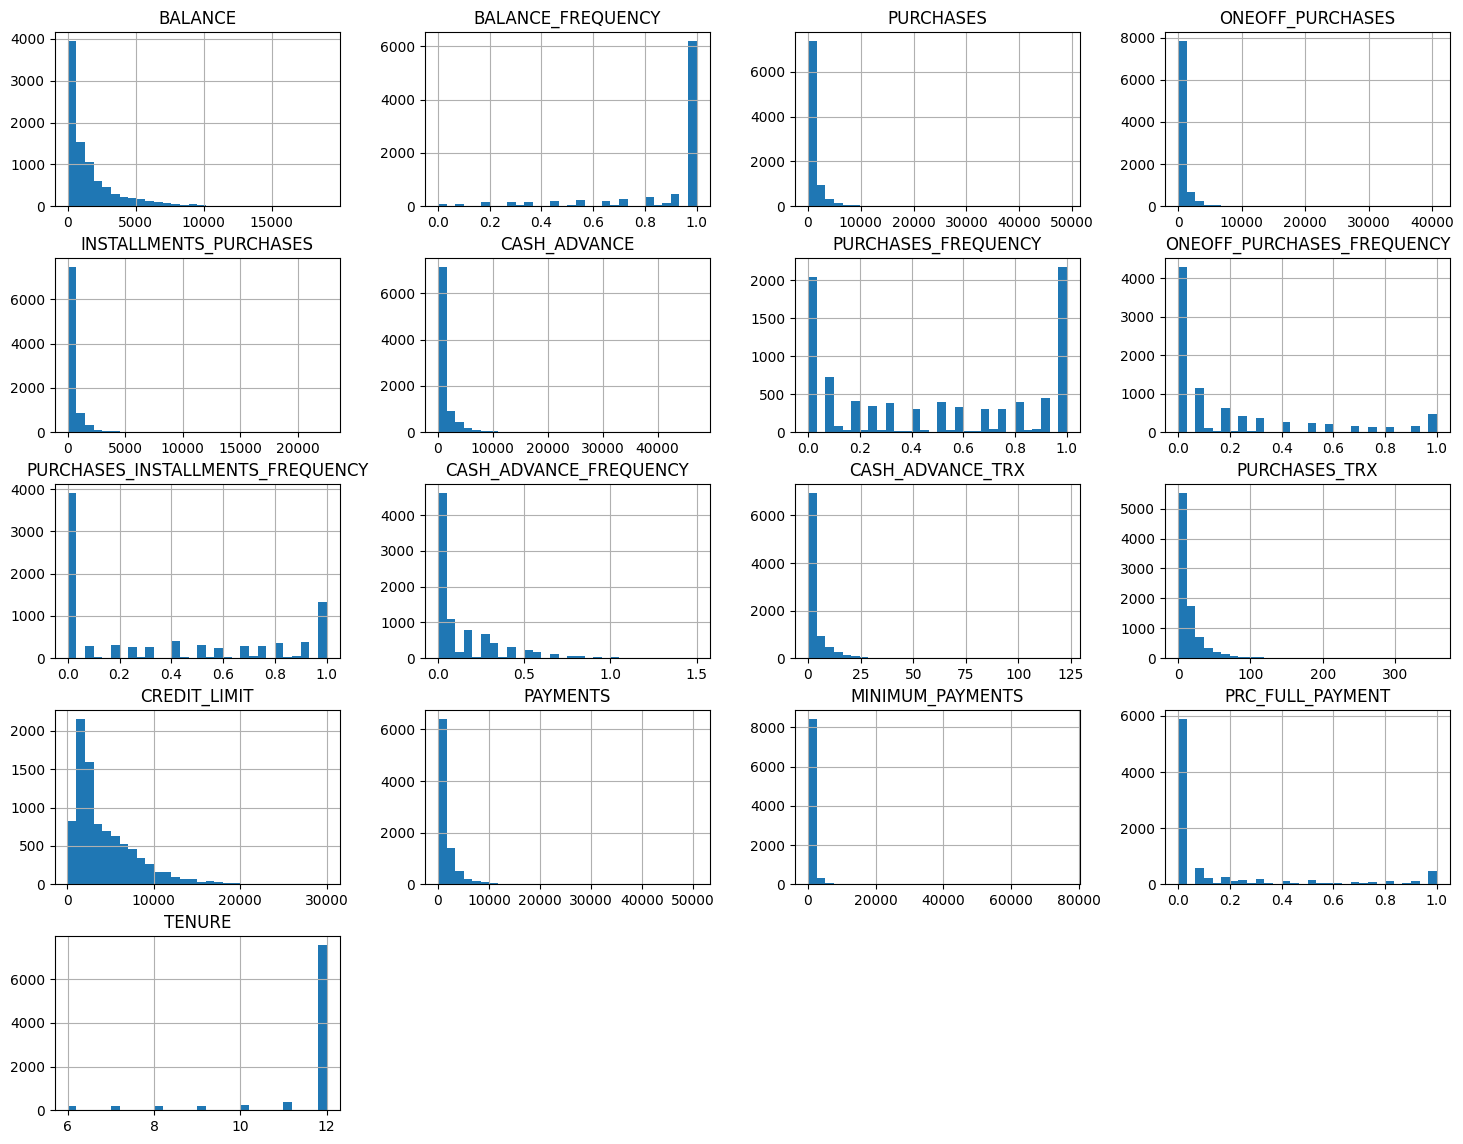

In [303]:
num_cols = df.select_dtypes(include='number').columns

df[num_cols].hist(figsize=(18,14), bins=30)
plt.show()

In [304]:
skewed_cols = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
               'CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','MINIMUM_PAYMENTS']

df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log1p(x))

skew_after = df[skewed_cols].skew()
print("Skewness after log transformation:\n",skew_after)

Skewness after log transformation:
 BALANCE                  -0.861021
PURCHASES                -0.764492
ONEOFF_PURCHASES          0.185854
INSTALLMENTS_PURCHASES   -0.024981
CASH_ADVANCE              0.262594
CASH_ADVANCE_TRX          0.940131
PURCHASES_TRX             0.032697
PAYMENTS                 -1.778312
MINIMUM_PAYMENTS          0.269703
dtype: float64


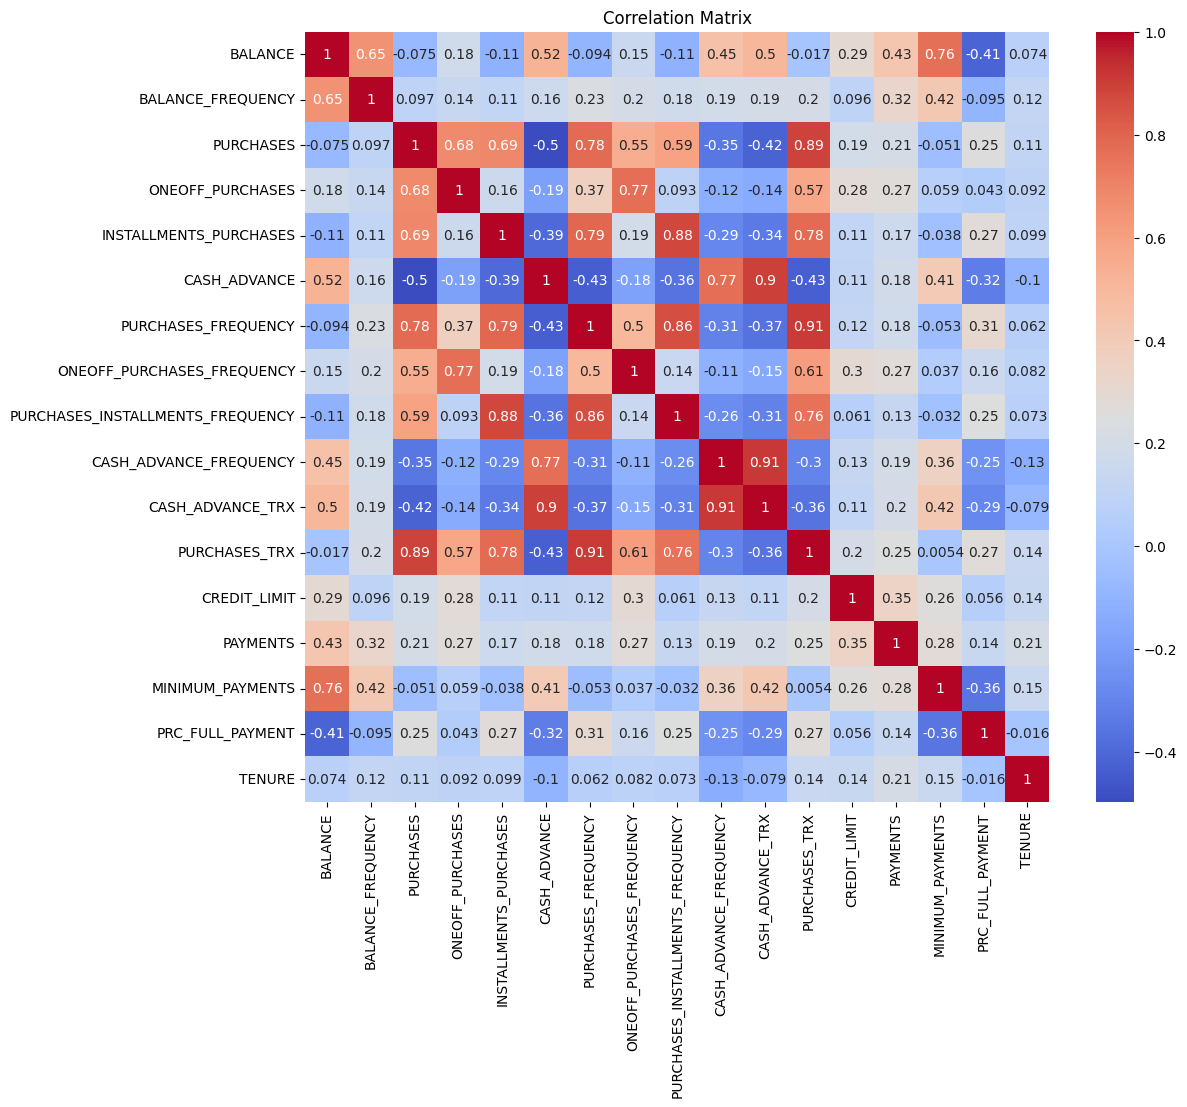

In [305]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [306]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

BALANCE: 132 outliers
BALANCE_FREQUENCY: 1493 outliers
PURCHASES: 0 outliers
ONEOFF_PURCHASES: 0 outliers
INSTALLMENTS_PURCHASES: 0 outliers
CASH_ADVANCE: 0 outliers
PURCHASES_FREQUENCY: 0 outliers
ONEOFF_PURCHASES_FREQUENCY: 782 outliers
PURCHASES_INSTALLMENTS_FREQUENCY: 0 outliers
CASH_ADVANCE_FREQUENCY: 525 outliers
CASH_ADVANCE_TRX: 15 outliers
PURCHASES_TRX: 0 outliers
CREDIT_LIMIT: 248 outliers
PAYMENTS: 318 outliers
MINIMUM_PAYMENTS: 169 outliers
PRC_FULL_PAYMENT: 1474 outliers
TENURE: 1366 outliers


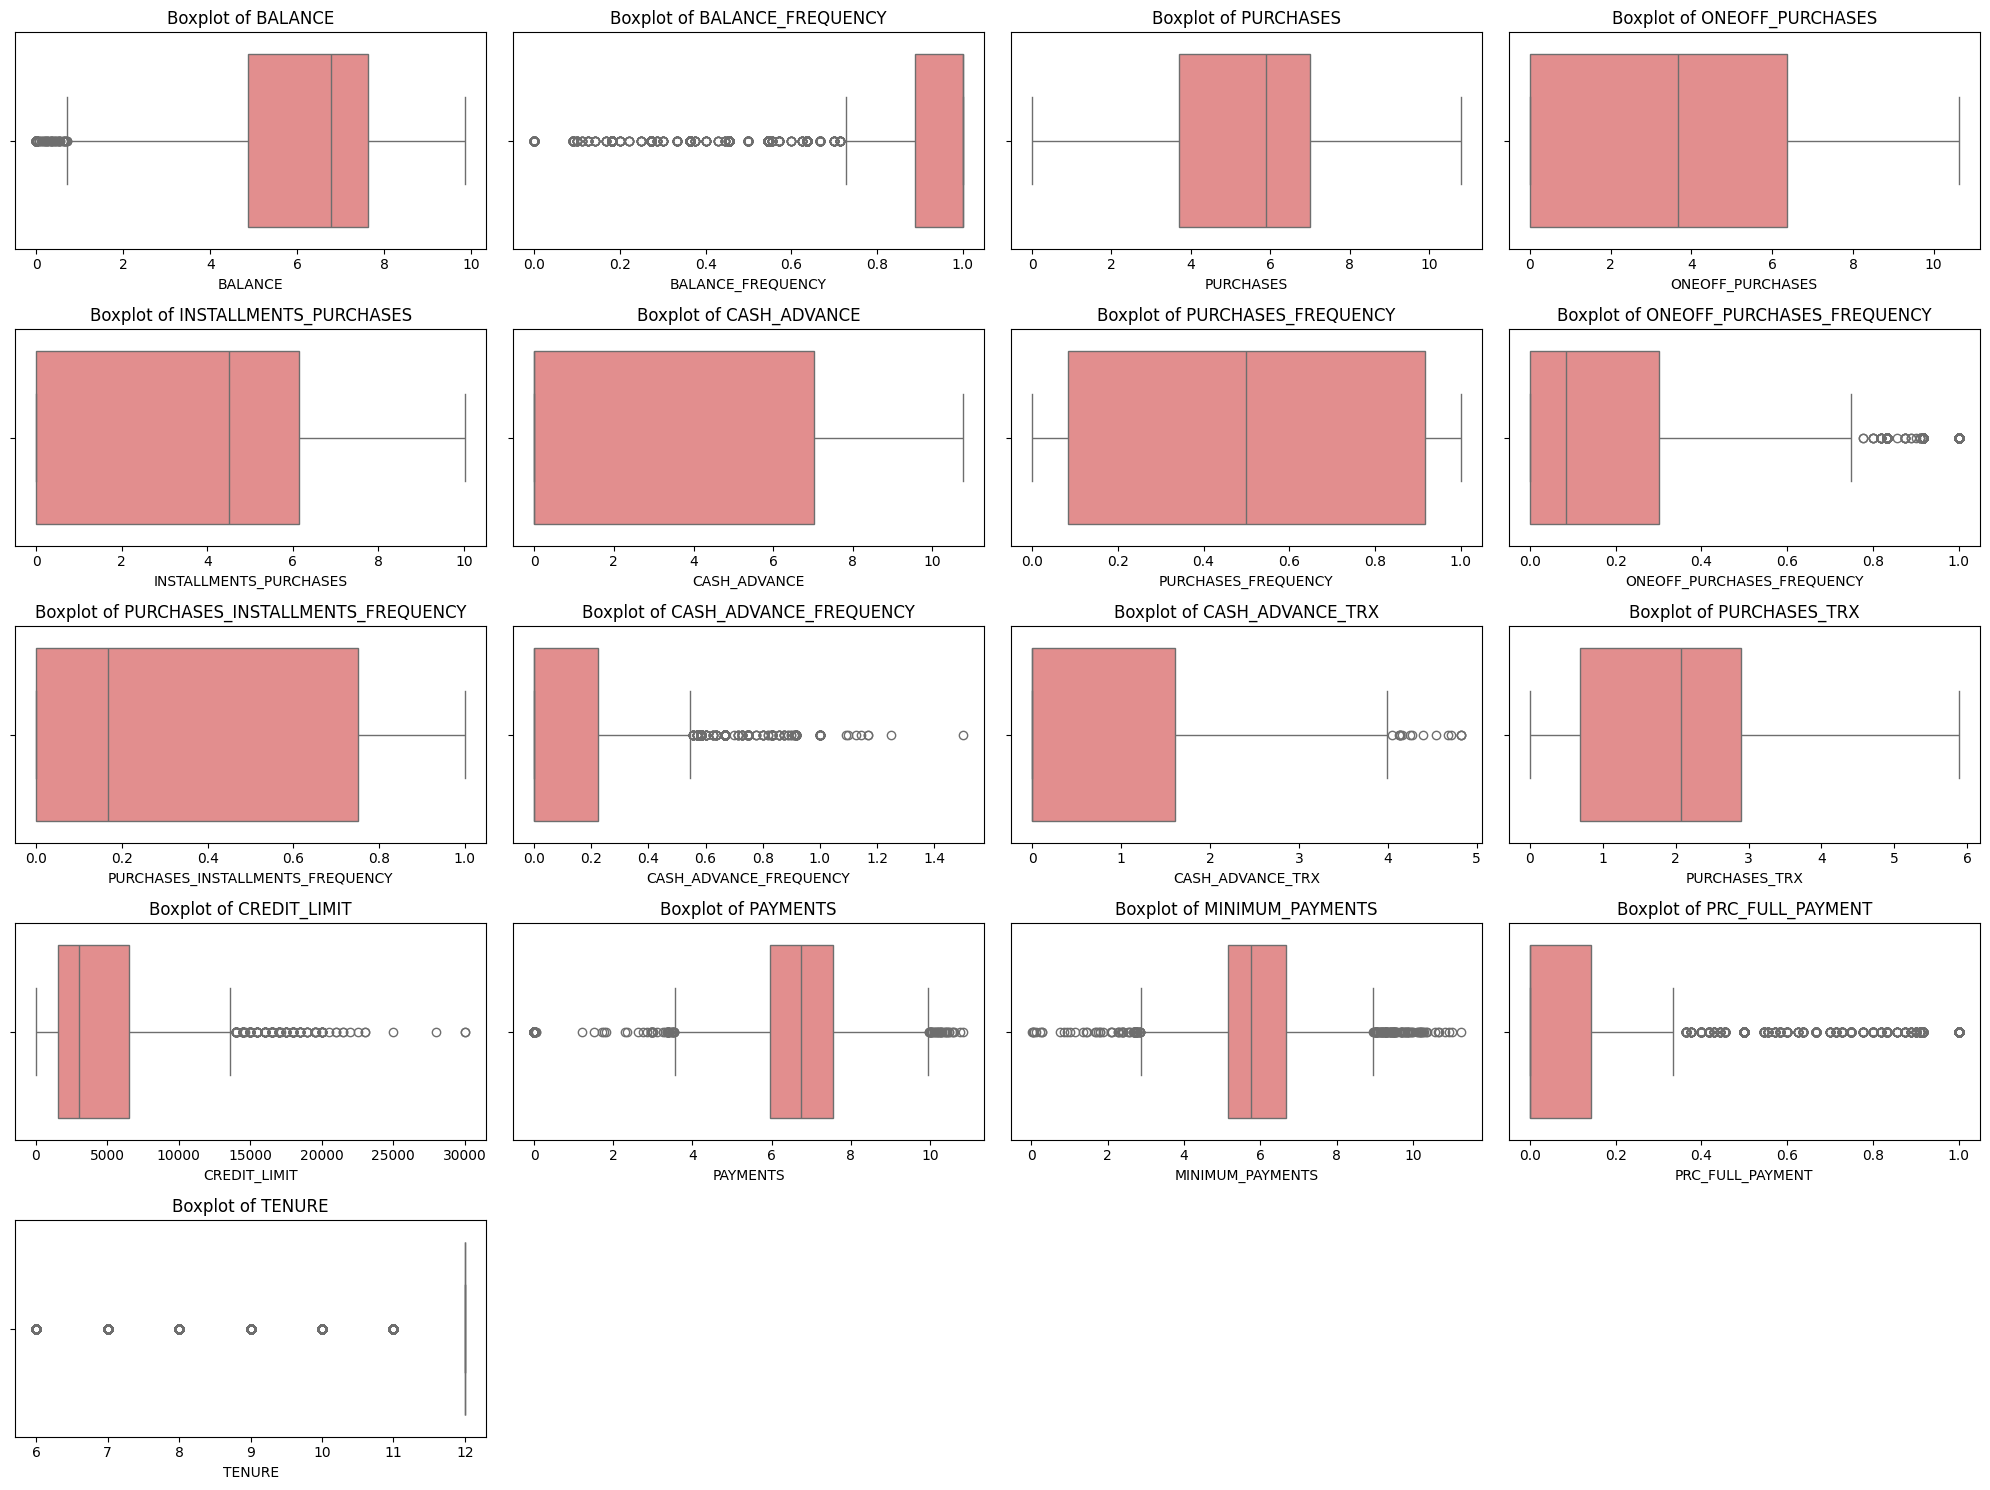

In [307]:
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Scaling

In [308]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

KMeans Clustering

In [309]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print("KMeans Silhouette Score:", silhouette_kmeans)

print("KMeans Cluster Summary:")
print(df.groupby('KMeans_Cluster').mean())

KMeans Silhouette Score: 0.21524745150424213
KMeans Cluster Summary:
                 BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                             
0               7.113874           0.980412   7.438964          6.700910   
1               7.405474           0.939402   1.605541          1.253400   
2               5.090244           0.915294   6.169533          1.250368   
3               3.972236           0.564845   4.854700          3.544737   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                             5.209203      2.975495             0.836015   
1                             0.494792      6.980535             0.072672   
2                             6.066055      0.742831             0.815141   
3                             1.790917      1.014151             0.238759   

           

Hierarchical Clustering

In [310]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled)
df['Hierarchical_Cluster'] = hc_labels

from sklearn.metrics import silhouette_score
silhouette_hc = silhouette_score(df_scaled, hc_labels)
print("Hierarchical Silhouette Score:", silhouette_hc)

print("Hierarchical Cluster Summary:")
print(df.groupby('Hierarchical_Cluster').mean())

Hierarchical Silhouette Score: 0.17526621339429788
Hierarchical Cluster Summary:
                       BALANCE  BALANCE_FREQUENCY  PURCHASES  \
Hierarchical_Cluster                                           
0                     5.927400           0.938509   6.316993   
1                     7.159300           0.912321   1.887991   
2                     3.157607           0.448587   5.028447   
3                     7.057426           0.984907   7.830482   

                      ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Hierarchical_Cluster                                                           
0                             3.409767                4.722643      1.310221   
1                             1.585713                0.591812      6.862959   
2                             2.353598                3.113672      0.731503   
3                             7.191879                6.139461      2.962616   

                      PURCHASES_FREQUENCY  ONEOFF_PUR

DBSCAN Clustering

In [311]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
db_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = db_labels

mask = db_labels != -1
silhouette_db = silhouette_score(df_scaled[mask], db_labels[mask])
print("DBSCAN Silhouette Score:", silhouette_db)

print("DBSCAN Cluster Summary:")
print(df.groupby('DBSCAN_Cluster').mean())

DBSCAN Silhouette Score: 0.08988590582462955
DBSCAN Cluster Summary:
                 BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
DBSCAN_Cluster                                                             
-1              5.908257           0.758124   5.547491          4.122929   
 0              6.253754           0.909168   4.777866          3.046943   
 1              0.030315           0.005682   5.672409          0.240167   
 2              0.947411           0.084416   4.011625          0.000000   
 3              3.571879           0.132231   0.063913          0.063913   
 4              7.090839           0.982143   5.943190          0.000000   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
DBSCAN_Cluster                                                              
-1                            3.330053      4.669635             0.502176   
 0                            3.353928      3.037782             0.488633   
 1            

Cluster visualization using PCA

In [312]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

print(df[['PCA1', 'PCA2']].head())

       PCA1      PCA2
0 -0.291130 -2.556648
1 -3.431718  1.003760
2  1.542577  1.266472
3 -1.284554 -1.219136
4 -1.159186 -1.244925


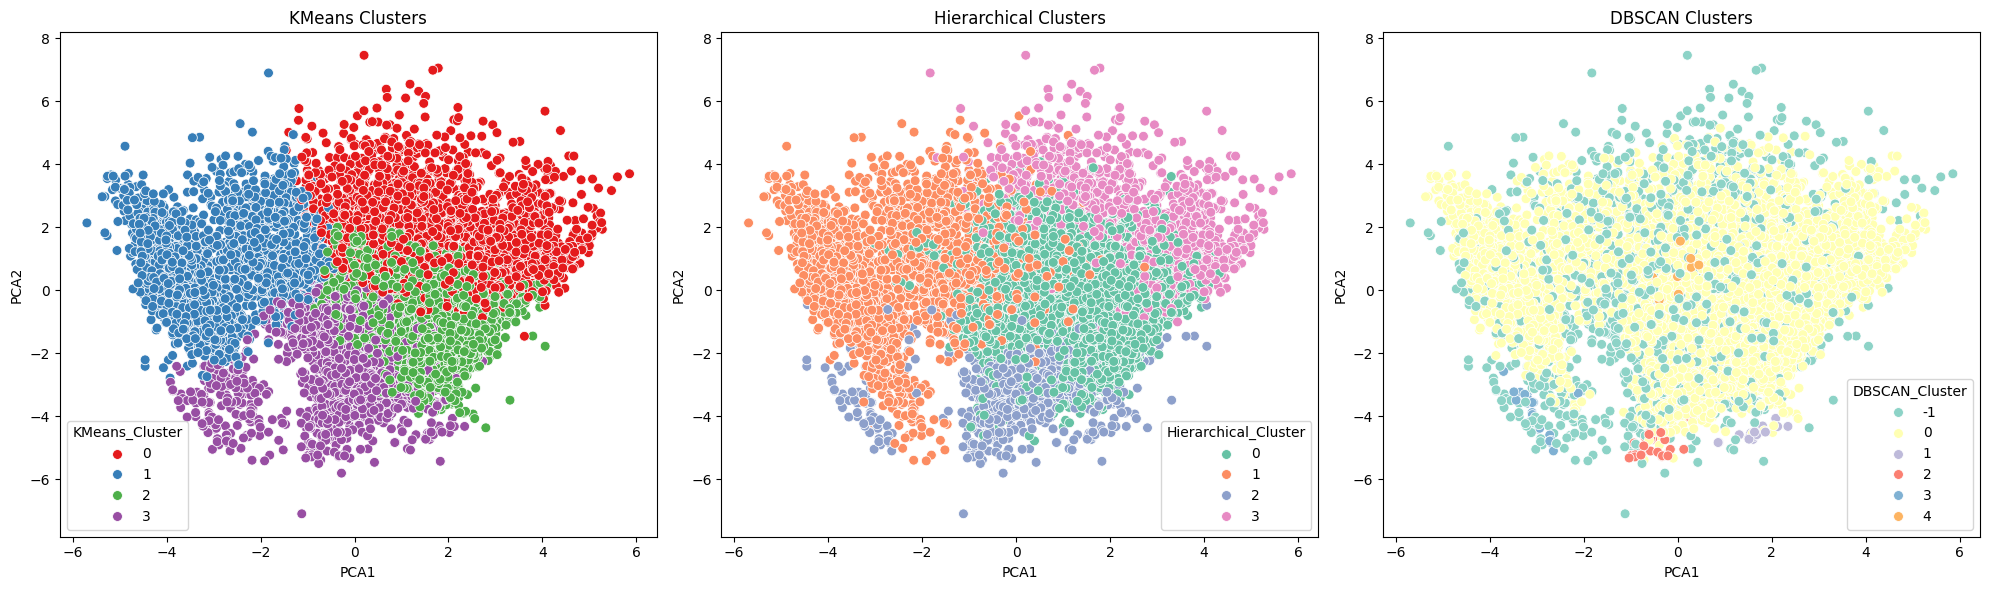

In [313]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# KMeans
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1', s=50, ax=axes[0])
axes[0].set_title('KMeans Clusters')

# Hierarchical
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='Set2', s=50, ax=axes[1])
axes[1].set_title('Hierarchical Clusters')

# DBSCAN
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='Set3', s=50, ax=axes[2])
axes[2].set_title('DBSCAN Clusters')

plt.tight_layout()
plt.show()